In [29]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
df=pd.read_csv('twitter_with_label.csv')

In [30]:
df.head()
df_text = df["text"]

In [174]:
df['rating'] = df['rating'].replace(4, 1)

In [175]:
df['rating']

0       1
1       1
2       1
3       1
4       0
       ..
9995    1
9996    0
9997    0
9998    1
9999    1
Name: rating, Length: 10000, dtype: int64

In [176]:
df['rating'].value_counts()

1    5034
0    4966
Name: rating, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='count'>

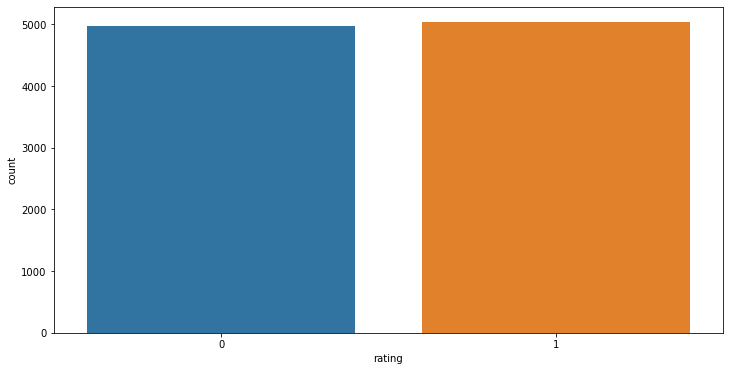

In [177]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.countplot(x='rating', data=df)

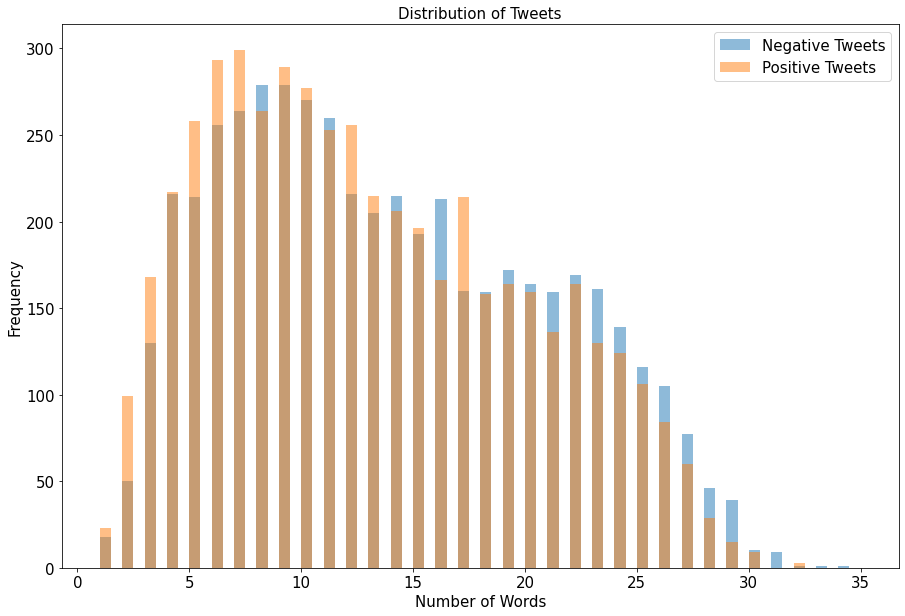

In [178]:
def count_words(text):
    words = text.split()
    return len(words)

word_counts = df['text'].apply(count_words)
neg_tweet = df['text'].loc[df['rating'] == 0]
pos_tweet = df['text'].loc[df['rating'] == 1]

neg_word_counts = neg_tweet.apply(count_words)
pos_word_counts = pos_tweet.apply(count_words)

fig, ax = plt.subplots(figsize=(15,10))
plt.hist(neg_word_counts, bins=range(1, max(word_counts)+2), width=0.5, label = "Negative Tweets", alpha = 0.5)
plt.hist(pos_word_counts, bins=range(1, max(word_counts)+2), width=0.5, label = "Positive Tweets", alpha = 0.5)
plt.title('Distribution of Tweets', fontsize = 15)
plt.xlabel('Number of Words', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.legend(fontsize = 15)
plt.show()

In [34]:
from collections import Counter

words = df['text'].str.split()
word_counts = Counter(word for sentence in words for word in sentence)
top_words = word_counts.most_common(10)

# Print the top 10 most common words
for word, count in top_words:
    print(f'{word}: {count}')

to: 3521
the: 3130
I: 3118
a: 2279
my: 1807
and: 1678
i: 1490
is: 1363
for: 1336
in: 1293


In [35]:
## REMOVE URLs

In [36]:
def remove_urls(text):
    #url_pattern = re.compile(r'https?://\S+|www\.\S+')
    url_pattern = re.compile(r'https?://[A-Za-z0-9./]+')
    cleaned_text = re.sub(url_pattern, '', text)
    return cleaned_text


df_text = df_text.apply(remove_urls)
#df['text'][25]

In [37]:
## Lowercasing

In [38]:
df_text = df_text.str.lower()
df_text

0       @nzsoulgirl hey there! yum...sangria! and snor...
1                    enjoyed that. now for sunday dinner 
2       show was awesome vegas, u made the last night ...
3               @dka34 damon welcome to twitter nation!  
4       @teemwilliams &amp; @dc3plusme: i thought i fo...
                              ...                        
9995    book 8 of love at stake is coming out march 20...
9996    can't believe i only got 4 days left in my lov...
9997    @lilyroseallen always   and i then look like a...
9998    @frankiefiction thankies.  i'll never be able ...
9999         @zaibatsu that is one very cute cat!!!    d3
Name: text, Length: 10000, dtype: object

In [39]:
## Removing Extra Whitespaces

In [40]:
# def remove_whitespace(text):
#     return  " ".join(text.split())

# for i in range(len(df_text['low_text'])):
#       df_text.loc[i, 'punc_text'] = remove_whitespace(df_text.loc[i, 'low_text'])
# df_text = df_text.drop(columns='low_text')

# #df_text['message']=df_text['message'].apply(remove_whitespace)
# df_text.head()

# df_text = df_text.str.strip()

In [41]:
## remmove retweet
df_text = df_text.str.replace('@[\w]*', '', regex=True)

In [42]:
## remove &amp &quot &lt
df_text = df_text.str.replace('&\S+', '', regex=True)

In [43]:
df_text

0        hey there! yum...sangria! and snorkeling soun...
1                     enjoyed that. now for sunday dinner
2       show was awesome vegas, u made the last night ...
3                        damon welcome to twitter nation!
4         : i thought i found mine but he left me for ...
                              ...                        
9995    book 8 of love at stake is coming out march 20...
9996    can't believe i only got 4 days left in my lov...
9997     always   and i then look like a freak always ...
9998     thankies.  i'll never be able to watch the mo...
9999                   that is one very cute cat!!!    d3
Name: text, Length: 10000, dtype: object

In [44]:
### remove punctuations

In [45]:
import string
def remove_punctuation(text):
    # Remove punctuation using the `translate` method of strings
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    return text
df_text = df_text.apply(remove_punctuation)

In [46]:
## remove stop words

In [47]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stop_words(text):
    # Split the text into words
    words = text.split()
    # Remove stop words using the `set()` function and list comprehension
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Join the remaining words into a string
    text = ' '.join(filtered_words)
    return text

# Apply the remove_stop_words function to each element in the Series
df_text = df_text.apply(remove_stop_words)

In [48]:
### Tokenization

In [49]:
# import nltk
# nltk.download('punkt')
# from nltk.tokenize import word_tokenize
# df_text['text']=df_text['punc_text'].apply(lambda X: word_tokenize(X))
# df_text = df_text.drop(columns='punc_text')
# df_text.head()

In [50]:
### spell check

In [51]:
from spellchecker import SpellChecker
#enchant.checker maybe quicker than spellchecker, used 8min but result is not good enough, can have an another try next week 
spell = SpellChecker(language = 'en')

In [67]:
# from symspellpy import SymSpell
# sym_spell = SymSpell()
# dictionary_path = "frequency_dictionary_en_82_765.txt"
# sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

# def correct_spelling(text):
#     suggestions = sym_spell.lookup(text, max_edit_distance=2)
#     return suggestions[0].term if suggestions else text



In [74]:
# df_sample = df_sample.apply(correct_spelling)

In [75]:
# df_sample = df_text[0:10]
# df_sample

In [76]:
# def spell_check(text):
    
#     result = []
#     for word in text:
#         correct_word = spell.correction(word)
#         result.append(correct_word)
    
#     return result


def spell_check(text):
    words = text.split()
    for word in words:
        corrected_word = spell.correction(word)
        if str(corrected_word) != "None": # Avoid None after spell check
            text = text.replace(word, str(corrected_word))
    return text
df_text = df_text.apply(spell_check)

In [77]:
df_text.head(20)

0     hey yumsangria snorkeling sounds amazing glad ...
1                                 enjoyed sunday dinner
2     show awesome vegas u made last night tour memo...
3                          damon welcome twitter nation
4     thought found mine left guy thought better twi...
5     actually said time right eat hat guess im goin...
6     trying figure husband twittering class proves ...
7     getting cranking falling press trying 7 months...
8      back gym already still trying get bed great week
9     realised physics cancelled today could got hou...
10     coming oh close area great trip bro talk ya soon
11                                             pleasure
12                                         lol thinking
13                                       overcast today
14    im late know stopped im tho eat play sims nigh...
15                       have noe idea what new mee lol
16               giving parked run money 700 good stuff
17    counting hours till get see 330 five hours

In [80]:
df_text.to_csv('spellchecked_tweets.csv')

In [117]:
### tokenization

In [118]:
df_text

0       hey yumsangria snorkeling sounds amazing glad ...
1                                   enjoyed sunday dinner
2       show awesome vegas u made last night tour memo...
3                            damon welcome twitter nation
4       thought found mine left guy thought better twi...
                              ...                        
9995    book 8 love stake coming march 2010 starring r...
9996    cant believe got 4 days left lovely school won...
9997    always look like freak always putting ear top ...
9998    thankies ill never able watch movie madagascar...
9999                                      one cute cat d3
Name: text, Length: 10000, dtype: object

In [81]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
df_text=df_text.apply(word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [82]:
#df.to_csv('tokenization_tweets_without_spell_check.csv')

In [83]:
### using spellchecked_tweets.csv below

In [84]:
# df_text.head()

In [85]:
### Removing Frequent Words

In [86]:
# from nltk import FreqDist

# def frequent_words(df):
    
#     lst=[]
#     for text in df.values:
#         lst+=text[0]
#     fdist=FreqDist(lst)
#     return fdist.most_common(10)
# frequent_words(df_text)

In [87]:
# freq_words = frequent_words(df_text)

# lst = []
# for a,b in freq_words:
#     lst.append(b)

# def remove_freq_words(text):
    
#     result=[]
#     for item in text:
#         if item not in lst:
#             result.append(item)
    
#     return result
    
# df_text['text']=df_text['text'].apply(remove_freq_words)

In [88]:
### Lemmatization

In [89]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,pos_tag

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ian\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ian\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Ian\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [90]:
# def lemmatization(text):
    
#     result=[]
#     wordnet = WordNetLemmatizer()
#     for token,tag in pos_tag(text):
#         pos=tag[0].lower()
        
#         if pos not in ['a', 'r', 'n', 'v']: # i don't know 'r' represents for what
#             pos='n'
            
#         result.append(wordnet.lemmatize(token,pos))
    
#     return result

# df_text['text']=df_text['text'].apply(lemmatization)
# df_text.head()
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    # Tokenize the text into words
       
    # Lemmatize each token using the WordNetLemmatizer
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in text]
    return lemmatized_tokens

df_text = df_text.apply(lemmatize_text)

In [91]:
df_text.head()

0    [hey, yumsangria, snorkeling, sound, amazing, ...
1                            [enjoyed, sunday, dinner]
2    [show, awesome, vega, u, made, last, night, to...
3                    [damon, welcome, twitter, nation]
4    [thought, found, mine, left, guy, thought, bet...
Name: text, dtype: object

In [92]:
#df_text.to_csv('cleaned_tweets.csv')

In [93]:
#put all tokens back as the tidy_tweet
for i in range(len(df_text)):
    df_text[i] = ' '.join(df_text[i])
df['tidy_tweet']=df_text


df.head()

,Unnamed: 0,rating,id,date,flag,user,text,tidy_tweet
0,894059,4,1692137234,Sun May 03 19:21:16 PDT 2009,NO_QUERY,cariquinn,@NZSoulGirl Hey there! Yum...sangria! And snor...,hey yumsangria snorkeling sound amazing glad y...
1,1467016,4,2064555259,Sun Jun 07 06:35:08 PDT 2009,NO_QUERY,Nigel_Derbyfan,Enjoyed that. Now for Sunday dinner,enjoyed sunday dinner
2,1150195,4,1978427680,Sat May 30 23:19:31 PDT 2009,NO_QUERY,YoungmoneyReef,"show was awesome vegas, u made the last night ...",show awesome vega u made last night tour memor...
3,1274449,4,2000971003,Mon Jun 01 23:28:13 PDT 2009,NO_QUERY,DoreenCotinola,@DKA34 Damon welcome to twitter Nation!,damon welcome twitter nation
4,620938,0,2228589656,Thu Jun 18 14:37:57 PDT 2009,NO_QUERY,tmac_82,@teemwilliams &amp; @dc3plusme: I thought I fo...,thought found mine left guy thought better twi...


In [94]:
words = df['tidy_tweet'].str.split()
word_counts = Counter(word for sentence in words for word in sentence)
top_words = word_counts.most_common(10)

# Print the top 10 most common words
for word, count in top_words:
    print(f'{word}: {count}')

im: 1066
day: 709
good: 587
get: 528
like: 519
go: 484
got: 445
u: 439
love: 439
dont: 421


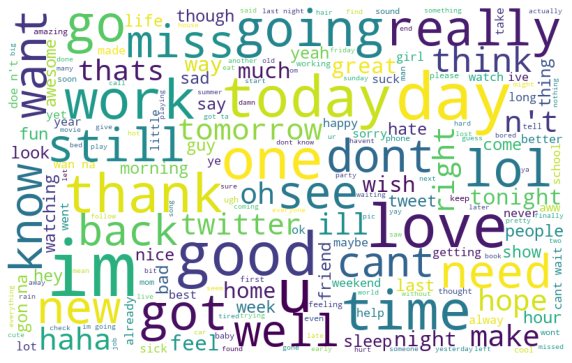

In [95]:
all_words=' '.join([text for text in df['tidy_tweet']])
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud=WordCloud(width=800, height=500, random_state=21,max_font_size=110, background_color="white").generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

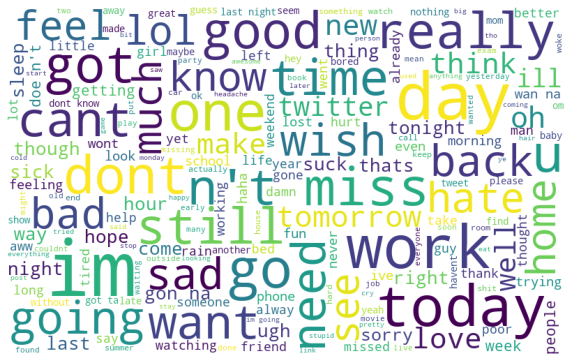

In [96]:
#wordcloud for negative tweets
non_negative_words=' '.join([text for text in df['tidy_tweet'][df['rating']==0]])
from wordcloud import WordCloud
word_cloud=WordCloud(width=800, height=500, random_state=21,max_font_size=110,background_color="white").generate(non_negative_words)

plt.figure(figsize=(10, 7))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

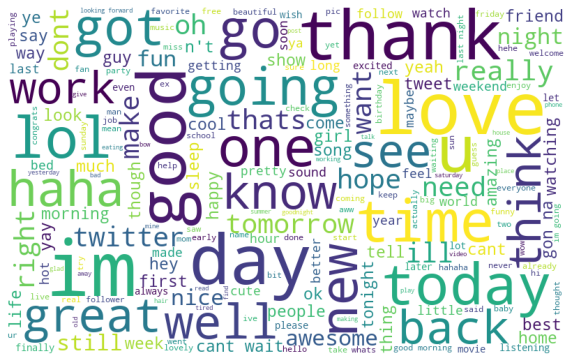

In [97]:
#wordcloud for positive tweets
negative_words=' '.join([text for text in df['tidy_tweet'][df['rating']==1]])
from wordcloud import WordCloud
word_cloud=WordCloud(width=800, height=500, random_state=21,max_font_size=110,background_color="white").generate(negative_words)

plt.figure(figsize=(10, 7))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

im: 468
good: 395
day: 371
love: 334
u: 256
like: 241
time: 231
get: 218
got: 209
thanks: 209
going: 201
today: 188
lol: 187
know: 186
new: 179
i: 179
one: 178
great: 167
go: 165
night: 155
cant: 151
see: 150
well: 147
haha: 141
back: 140
morning: 135
dont: 130
happy: 128
think: 126
oh: 120


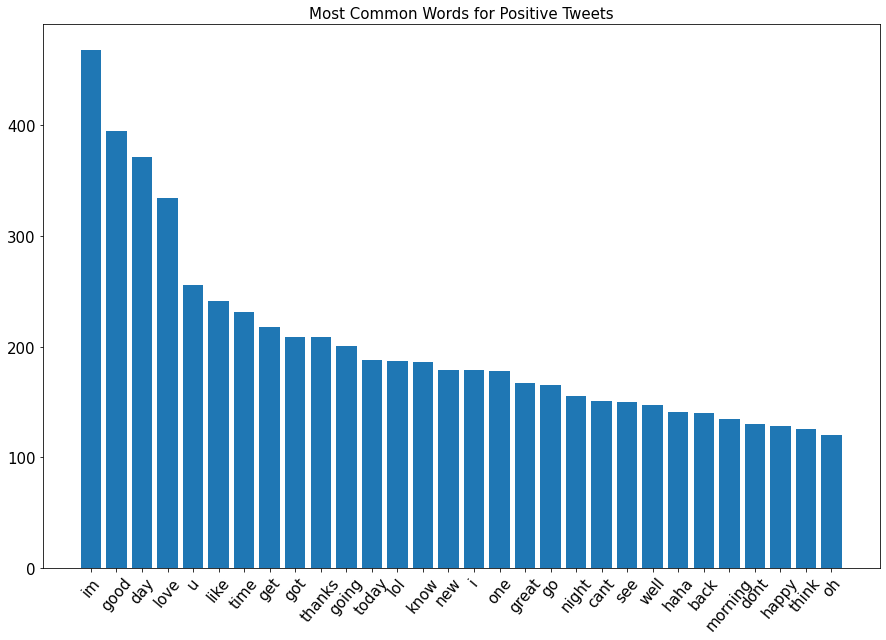

In [148]:
pos_words = df['tidy_tweet'].loc[df['rating'] == 1].str.split()

#words = df['tidy_tweet'].str.split()
word_counts = Counter(word for sentence in pos_words for word in sentence)
top_words = word_counts.most_common(30)

# Print the top 10 most common words
for word, count in top_words:
    print(f'{word}: {count}')

ls_of_words = []
ls_of_num = []
for word in top_words:
    ls_of_words.append(word[0])
    
for num in top_words:
    ls_of_num.append(num[1])
    
fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.xticks(rotation = 50)
plt.bar(ls_of_words, ls_of_num)
plt.title('Most Common Words for Positive Tweets', fontsize = 15)

plt.show()

im: 598
day: 338
go: 319
get: 310
work: 298
dont: 291
like: 278
n't: 269
cant: 247
got: 236
today: 220
want: 217
one: 209
miss: 199
back: 194
still: 193
going: 192
good: 192
really: 184
u: 183
i: 177
know: 172
time: 170
need: 163
last: 161
na: 159
sad: 158
feel: 153
home: 153
2: 150


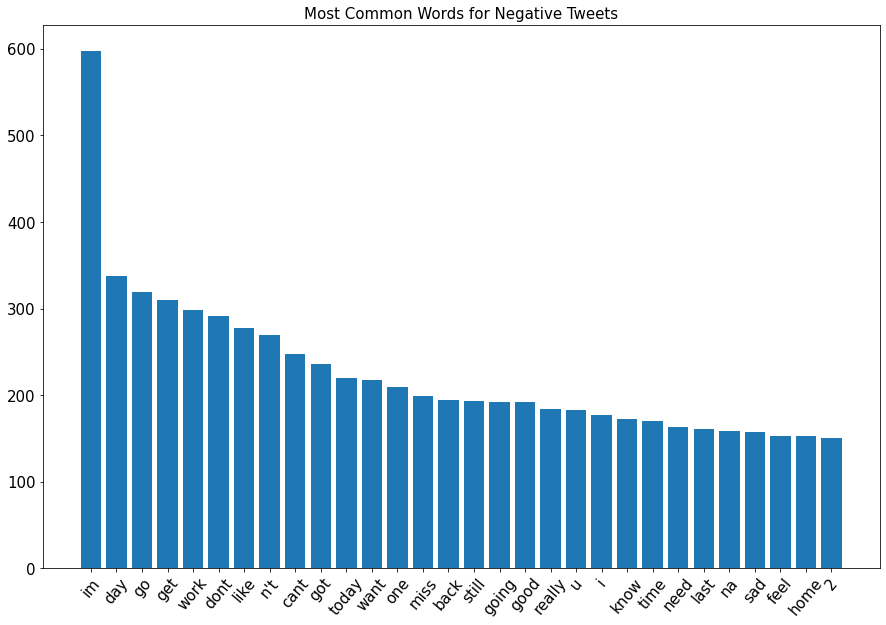

In [149]:
neg_words = df['tidy_tweet'].loc[df['rating'] == 0].str.split()

#words = df['tidy_tweet'].str.split()
word_counts = Counter(word for sentence in neg_words for word in sentence)
top_words = word_counts.most_common(30)

# Print the top 10 most common words
for word, count in top_words:
    print(f'{word}: {count}')

ls_of_words = []
ls_of_num = []
for word in top_words:
    ls_of_words.append(word[0])
    
for num in top_words:
    ls_of_num.append(num[1])
    
fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.xticks(rotation = 50)
plt.bar(ls_of_words, ls_of_num)
plt.title('Most Common Words for Negative Tweets', fontsize = 15)

plt.show()

In [164]:
#bag of word features
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow=bow_vectorizer.fit_transform(df['tidy_tweet'])

bow.shape

(10000, 1000)

In [172]:
df['rating'][:7500]

0       4
1       4
2       4
3       4
4       0
       ..
7495    4
7496    0
7497    4
7498    4
7499    4
Name: rating, Length: 7500, dtype: int64

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

train_bow = bow[:7500,:]
test_bow = bow[7500:,:]

xtrain_bow, xval_bow,ytrain,yval=train_test_split(train_bow,df['rating'][:7500],random_state=42,test_size=0.3)

lr=LogisticRegression()
lr.fit(xtrain_bow,ytrain)

prediction=lr.predict_proba(xval_bow)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

print(confusion_matrix(yval, prediction_int))
print("Accuracy: ", accuracy_score(yval, prediction_int))
print("F1 score: ", f1_score(yval, prediction_int))

[[ 502  602]
 [ 113 1033]]
Accuracy:  0.6822222222222222
F1 score:  0.7428982380438691


C:\Users\Ian\AppData\Local\Temp/ipykernel_19956/1332697492.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prediction_int = prediction_int.astype(np.int)


In [184]:
#TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf=tfidf_vectorizer.fit_transform(df['tidy_tweet'])

tfidf.shape

(10000, 1000)

In [188]:
#TF-IDF
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yval.index]

lr.fit(xtrain_tfidf, ytrain)

prediction = lr.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

print(confusion_matrix(yval, prediction_int))
print("Accuracy: ", accuracy_score(yval, prediction_int))
print("F1 score: ", f1_score(yval, prediction_int))

[[ 392  712]
 [  54 1092]]
Accuracy:  0.6595555555555556
F1 score:  0.7403389830508476


C:\Users\Ian\AppData\Local\Temp/ipykernel_19956/3546243253.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prediction_int = prediction_int.astype(np.int)


In [161]:
# import gensim
# tokenized_tweet = df['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

# model_w2v = gensim.models.Word2Vec(
#             tokenized_tweet,
#             size=200, # desired no. of features/independent variables 
#             window=5, # context window size
#             min_count=2,
#             sg = 1, # 1 for skip-gram model
#             hs = 0,
#             negative = 10, # for negative sampling
#             workers= 2, # no.of cores
#             seed = 34)

# model_w2v.train(tokenized_tweet, total_examples= len(df['tidy_tweet']), epochs=20)

In [159]:
# pip install gensim

Note: you may need to restart the kernel to use updated packages.
